# Principal Component Analysis

## Course Reminder

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.  

*References allowed: Aide mémoire ACP*  

### Main Steps

<font color="red"> Input : X (Dimension : n (samples) x p (variables, features))  </font>

1. **Standardize the data (Centrage-Réduction en fr.)** (Output dim : n x p)
    - Notation: $X_c$  
    - Objective: Homogenize the point cloud.
    - Principle: Subtracting the columns by their mean and then dividing the columns by their standard deviation.  
    - Useful formulas (from your course):  
        $\bar{x_j}=\frac{1}{n}\sum_{i=1}^nx_{i,j}$  
        $\sigma_j^2=\frac{1}{n}\sum_{i=1}^n(x_{i,j}-\bar{x_j})^2$  
        Standard deviation (écart-type) : $\sigma$  
    - Checking process: the mean of each column is NULL and the standard deviation is equal to 1.
    


2. **Calculate the sample covariance matrix** (Output dim : p x p)
    - Useful formulas :  
        $V=\frac{1}{n-1}X_c^TX_c$  
        Basic: $\Sigma_{j,k}=\frac{1}{n-1}\sum_{i=1}^nx_{i,j}x_{i,k}-\bar{x_j}\bar{x_k}$  


3. **Calculate the eigenvalues and eigenvectors for the covariance matrix.**
    - Principle: Solving a system of equations (determinant calculation...)
    - Checking process: $X_cu_1=\lambda_1u_1$ 
    

4. **Sort eigenvalues and their corresponding eigenvectors<=>factor axis.**  
The principal axis is related to the highest eigenvalue and its corresponding eigenvector.

5. **Pick k eigenvalues and form a matrix of eigenvectors.**  
    - Objective: Choosing a limit number of factors that explain well the data.
    - Principle: Calculating the percentages of explained inertia and cumulated explained inertia.  
    - Useful formulas :  
        $D_j$ : $\frac{\lambda_j}{\sum_{j=1}^{p'}\lambda_j}*100$  
        $\frac{\sum_{j=1}^{k}\lambda_j}{\sum_{j=1}^{p'}\lambda_j}*100$
        
6. **Transform the original matrix.** 

$C=X_cU$ (components)


<font color="red"> Output : C (Dimension : n (samples) x p' (new variables))  </font>

7. **Further Analysis**
    - Relative contribution of axes to individuals
    - Relative contribution of individuals to axes
    - Correlation circle

## The Data
We will use the famous Iris flower data set.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Here is a picture of the three different Iris types:

In [1]:
# The Iris Setosa
from IPython.display import Image
Image('Kosaciec_szczecinkowaty_Iris_setosa.jpg',width=300, height=300)

FileNotFoundError: No such file or directory: 'Kosaciec_szczecinkowaty_Iris_setosa.jpg'

FileNotFoundError: No such file or directory: 'Kosaciec_szczecinkowaty_Iris_setosa.jpg'

<IPython.core.display.Image object>

In [2]:
#to show an image directly from its url without downloading it or you can download it from wikipedia and then, use the cell above.
import urllib.request
from PIL import Image

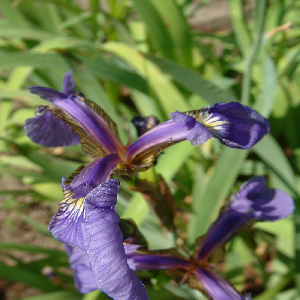

In [3]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg'
im1 = Image.open(urllib.request.urlopen(url))
newsize = (300, 300) 
im1.resize(newsize)

In [4]:
# The Iris Versicolor
from IPython.display import Image
Image('Iris_versicolor_3.jpg',width=300, height=300)

FileNotFoundError: No such file or directory: 'Iris_versicolor_3.jpg'

FileNotFoundError: No such file or directory: 'Iris_versicolor_3.jpg'

<IPython.core.display.Image object>

In [5]:
# The Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image('Iris_virginica.jpg',width=300, height=300)

FileNotFoundError: No such file or directory: 'Iris_virginica.jpg'

FileNotFoundError: No such file or directory: 'Iris_virginica.jpg'

<IPython.core.display.Image object>

## Get the data

### Importing some libraries we will need.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the iris dataset from sklearn.

In [7]:
from sklearn import datasets
iris_dataset = datasets.load_iris() 
X_Iris = iris_dataset.data[:, :4]  
Y_Iris = iris_dataset.target
X_iris = pd.DataFrame(X_Iris,columns = ['SLength','SWIDTH', 'PLength','PWIDTH'])
Y_iris = pd.DataFrame(Y_Iris, columns = ['Class'])
iris = pd.concat([X_iris, Y_iris], axis=1)
iris.describe()

,SLength,SWIDTH,PLength,PWIDTH,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Describing the data (dimensions...)

In [8]:
print(X_iris.shape)
#nombre d'observations
n = X_iris.shape[0]
#nombre de variables
p = X_iris.shape[1]

(150, 4)


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

- Iris-setosa (n=50)
- Iris-versicolor (n=50)
- Iris-virginica (n=50)

The four features of the Iris dataset:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

## Exploratory Data Analysis


### Creating a pairplot of the data set. 

Which flower species seems to be the most separable?

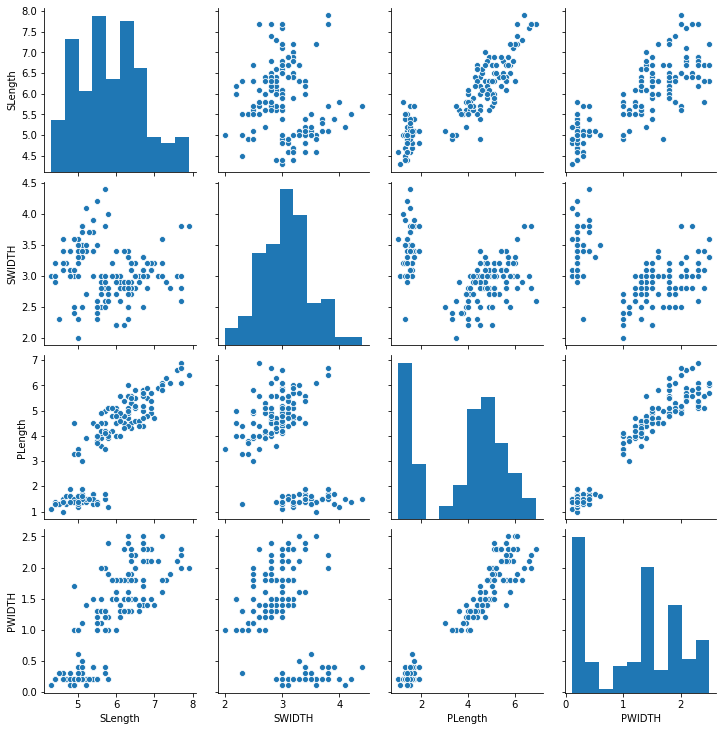

In [9]:
import seaborn as sns
# Setosa is the most separable. 


Existence de variables corrélées.

## PCA Visualization

Since it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.  

Before we do this though, we'll need to scale our data so that each feature has a single unit variance. (Step 1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_iris)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(X_iris)
print(scaled_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the dimensionality reduction by calling transform(). (Step 2 to 8)

*Same processing than the first tutorial.*

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=4) #here the number components asked is equal to the maximumn number (i.e the total number of the original features).

Main parameters:
- n_components : by default, it's the total number. We can by this way specify how many components we want to keep when creating the PCA object.

The other parameters can be kept with their default value. It concerns mainly SVD (Singular Value Decomposition), the method to compute the eigenvectors.

In [15]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can visualize this data using its first 2 principal components.

In [16]:
x_pca = pca.transform(scaled_data)

In [17]:
scaled_data.shape

(150, 4)

In [18]:
x_pca.shape

(150, 4)

Text(0, 0.5, 'Second Principal Component')

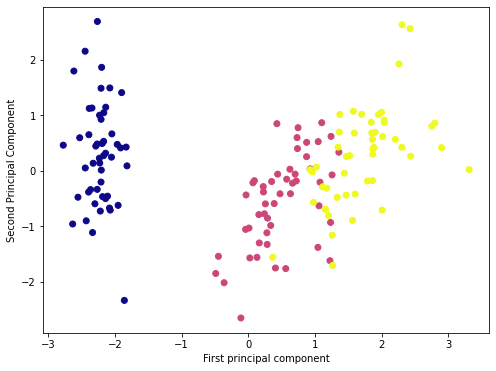

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=iris_dataset.target,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can visualize the distribution of these three classes.

### Interpreting the components and their contribution to evaluate the PCA quality

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [20]:
# Explained variance (eigenvalues)
print(pca.explained_variance_)

# Corrected variance values  correspond à l'estimation (sans biais) de la variance théorique
corrected_variance = ((n-1)/n)*pca.explained_variance_
print(corrected_variance)

[2.93808505 0.9201649  0.14774182 0.02085386]
[2.91849782 0.91403047 0.14675688 0.02071484]


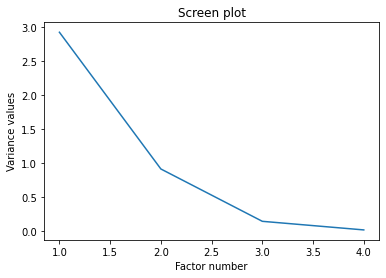

In [21]:
# plot the explained variance of each component
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Screen plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

In [22]:
pca.explained_variance_ratio_*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [23]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

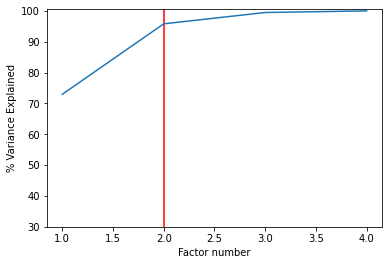

In [24]:
# plot the explained variance of each component
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')
plt.axvline(x=2.0,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

### How to interpret the original variables with the new axis?

#### Variable representation

In [25]:
# the components_ field of the PCA object
print(pca.components_)
pca.components_

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

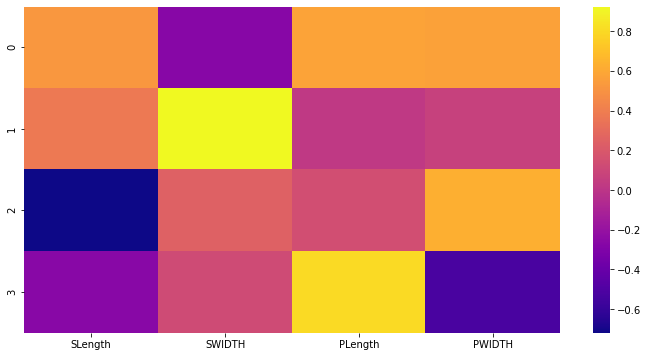

In [26]:
df_comp = pd.DataFrame(pca.components_,columns=X_iris.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

#### Computing the correlation between the principal components and the variables and the correlation circle.

<!-- Au lieu de passer par le calcul de D. https://stats.stackexchange.com/questions/253718/correlation-between-an-original-variable-and-a-principal-component + https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another -->

In [27]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar)

[[ 0.89016876  0.36082989 -0.27565767 -0.03760602]
 [-0.46014271  0.88271627  0.09361987  0.01777631]
 [ 0.99155518  0.02341519  0.05444699  0.11534978]
 [ 0.96497896  0.06399985  0.24298265 -0.0753595 ]]


$r_{X_j}(F_k)=\sqrt{\lambda_k}\times a_{j,k}$

In [28]:
# Print the correlations for the first two axes
print(pd.DataFrame({'id':X_iris.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

        id     COR_1     COR_2
0  SLength  0.890169  0.360830
1   SWIDTH -0.460143  0.882716
2  PLength  0.991555  0.023415
3   PWIDTH  0.964979  0.064000


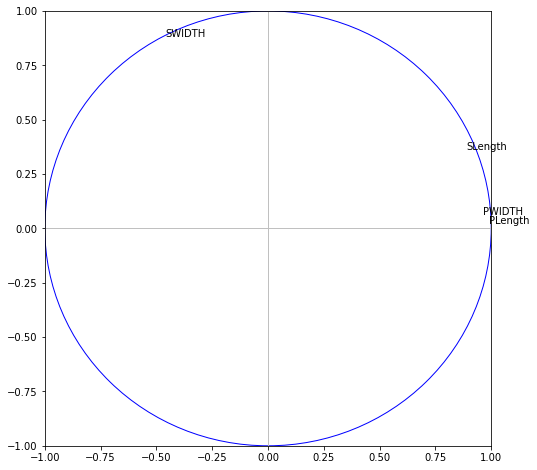

In [29]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(X_iris.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()